# PowerBall Winning Numbers!
In this notebook we will look at the PowerBall Winning Numbers from: 2010-2023 using <a href='https://www.kaggle.com/datasets/ulrikthygepedersen/lottery-powerball-winning-numbers?'>this</a> dataset from kaggle.com.

In [1]:
#Import the libraries needed
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read Lottery csv
powerBall = pd.read_csv('./Lottery_Powerball_Winning_Numbers__Beginning_2010.csv', parse_dates=['Draw Date'])

In [3]:
#check result
powerBall

,Draw Date,Winning Numbers,Multiplier
0,2020-09-26,11 21 27 36 62 24,3.0
1,2020-09-30,14 18 36 49 67 18,2.0
2,2020-10-03,18 31 36 43 47 20,2.0
3,2020-10-07,06 24 30 53 56 19,2.0
4,2020-10-10,05 18 23 40 50 18,3.0
...,...,...,...
1424,2023-01-30,01 04 12 36 49 05,2.0
1425,2023-02-01,31 43 58 59 66 09,2.0
1426,2023-02-04,02 08 15 19 58 10,2.0
1427,2023-02-06,05 11 22 23 69 07,2.0


### Now that we have our data, let's seperate out the winning numbers into their own columns.

In [4]:
# Convert Winning Numbers to individual columns
powerBall[['num1', 'num2','num3', 'num4','num5', 'num6']] = powerBall['Winning Numbers'].str.split(' ', expand=True)
powerBall

,Draw Date,Winning Numbers,Multiplier,num1,num2,num3,num4,num5,num6
0,2020-09-26,11 21 27 36 62 24,3.0,11,21,27,36,62,24
1,2020-09-30,14 18 36 49 67 18,2.0,14,18,36,49,67,18
2,2020-10-03,18 31 36 43 47 20,2.0,18,31,36,43,47,20
3,2020-10-07,06 24 30 53 56 19,2.0,06,24,30,53,56,19
4,2020-10-10,05 18 23 40 50 18,3.0,05,18,23,40,50,18
...,...,...,...,...,...,...,...,...,...
1424,2023-01-30,01 04 12 36 49 05,2.0,01,04,12,36,49,05
1425,2023-02-01,31 43 58 59 66 09,2.0,31,43,58,59,66,09
1426,2023-02-04,02 08 15 19 58 10,2.0,02,08,15,19,58,10
1427,2023-02-06,05 11 22 23 69 07,2.0,05,11,22,23,69,07


In [5]:
# Cast the number columns as type integer
powerBall = powerBall.astype({
    'num1': 'Int64',
    'num2': 'Int64',
    'num3': 'Int64',
    'num4': 'Int64',
    'num5': 'Int64',
    'num6': 'Int64',
})
powerBall.dtypes


Draw Date          datetime64[ns]
Winning Numbers            object
Multiplier                float64
num1                        Int64
num2                        Int64
num3                        Int64
num4                        Int64
num5                        Int64
num6                        Int64
dtype: object

In [6]:
# Most common Multiplier
mult = powerBall['Multiplier'].value_counts()

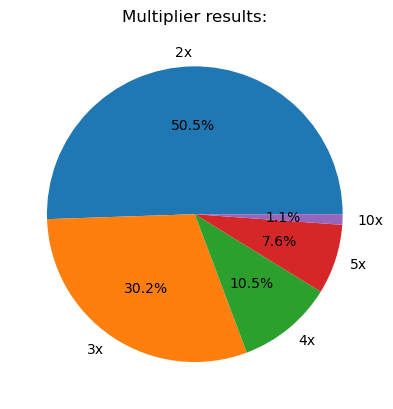

In [56]:
mult.plot(kind='pie', title='Multiplier results:', ylabel='', labels=['2x', '3x', '4x', '5x', '10x'], autopct='%1.1f%%')
plt.savefig('multiplierPie.png')

In [8]:
# Month with them most x10 multiplier
# add a month column to the dataframe
powerBall['Month'] = powerBall['Draw Date'].dt.month
powerBall

,Draw Date,Winning Numbers,Multiplier,num1,num2,num3,num4,num5,num6,Month
0,2020-09-26,11 21 27 36 62 24,3.0,11,21,27,36,62,24,9
1,2020-09-30,14 18 36 49 67 18,2.0,14,18,36,49,67,18,9
2,2020-10-03,18 31 36 43 47 20,2.0,18,31,36,43,47,20,10
3,2020-10-07,06 24 30 53 56 19,2.0,6,24,30,53,56,19,10
4,2020-10-10,05 18 23 40 50 18,3.0,5,18,23,40,50,18,10
...,...,...,...,...,...,...,...,...,...,...
1424,2023-01-30,01 04 12 36 49 05,2.0,1,4,12,36,49,5,1
1425,2023-02-01,31 43 58 59 66 09,2.0,31,43,58,59,66,9,2
1426,2023-02-04,02 08 15 19 58 10,2.0,2,8,15,19,58,10,2
1427,2023-02-06,05 11 22 23 69 07,2.0,5,11,22,23,69,7,2


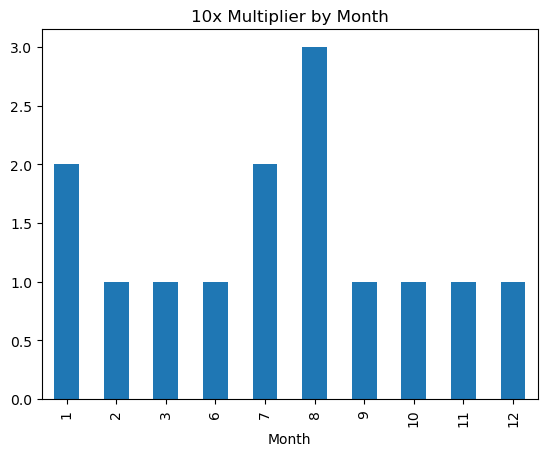

In [59]:
powerBall[powerBall['Multiplier'] == 10]['Month'].value_counts().sort_index().plot(kind='bar', title="10x Multiplier by Month")
plt.savefig('./images/10xmultipler.png')

In [34]:
powerBall[powerBall['Multiplier'] == 10].count()

Draw Date          14
Winning Numbers    14
Multiplier         14
num1               14
num2               14
num3               14
num4               14
num5               14
num6               14
Month              14
Day of Week        14
dtype: int64

In [10]:
# Most common numbers on a given Day
powerBall['Day of Week'] = powerBall['Draw Date'].dt.weekday
powerBall

,Draw Date,Winning Numbers,Multiplier,num1,num2,num3,num4,num5,num6,Month,Day of Week
0,2020-09-26,11 21 27 36 62 24,3.0,11,21,27,36,62,24,9,5
1,2020-09-30,14 18 36 49 67 18,2.0,14,18,36,49,67,18,9,2
2,2020-10-03,18 31 36 43 47 20,2.0,18,31,36,43,47,20,10,5
3,2020-10-07,06 24 30 53 56 19,2.0,6,24,30,53,56,19,10,2
4,2020-10-10,05 18 23 40 50 18,3.0,5,18,23,40,50,18,10,5
...,...,...,...,...,...,...,...,...,...,...,...
1424,2023-01-30,01 04 12 36 49 05,2.0,1,4,12,36,49,5,1,0
1425,2023-02-01,31 43 58 59 66 09,2.0,31,43,58,59,66,9,2,2
1426,2023-02-04,02 08 15 19 58 10,2.0,2,8,15,19,58,10,2,5
1427,2023-02-06,05 11 22 23 69 07,2.0,5,11,22,23,69,7,2,0


In [11]:
nums = powerBall[['num1','num2','num3','num4','num5', 'num6']]

In [12]:
num1 = nums['num1'].value_counts().sort_index()
num2 = nums['num2'].value_counts().sort_index()
num3 = nums['num3'].value_counts().sort_index()
num4 = nums['num4'].value_counts().sort_index()
num5 = nums['num5'].value_counts().sort_index()
num6 = nums['num6'].value_counts().sort_index()

<Axes: xlabel='num6'>

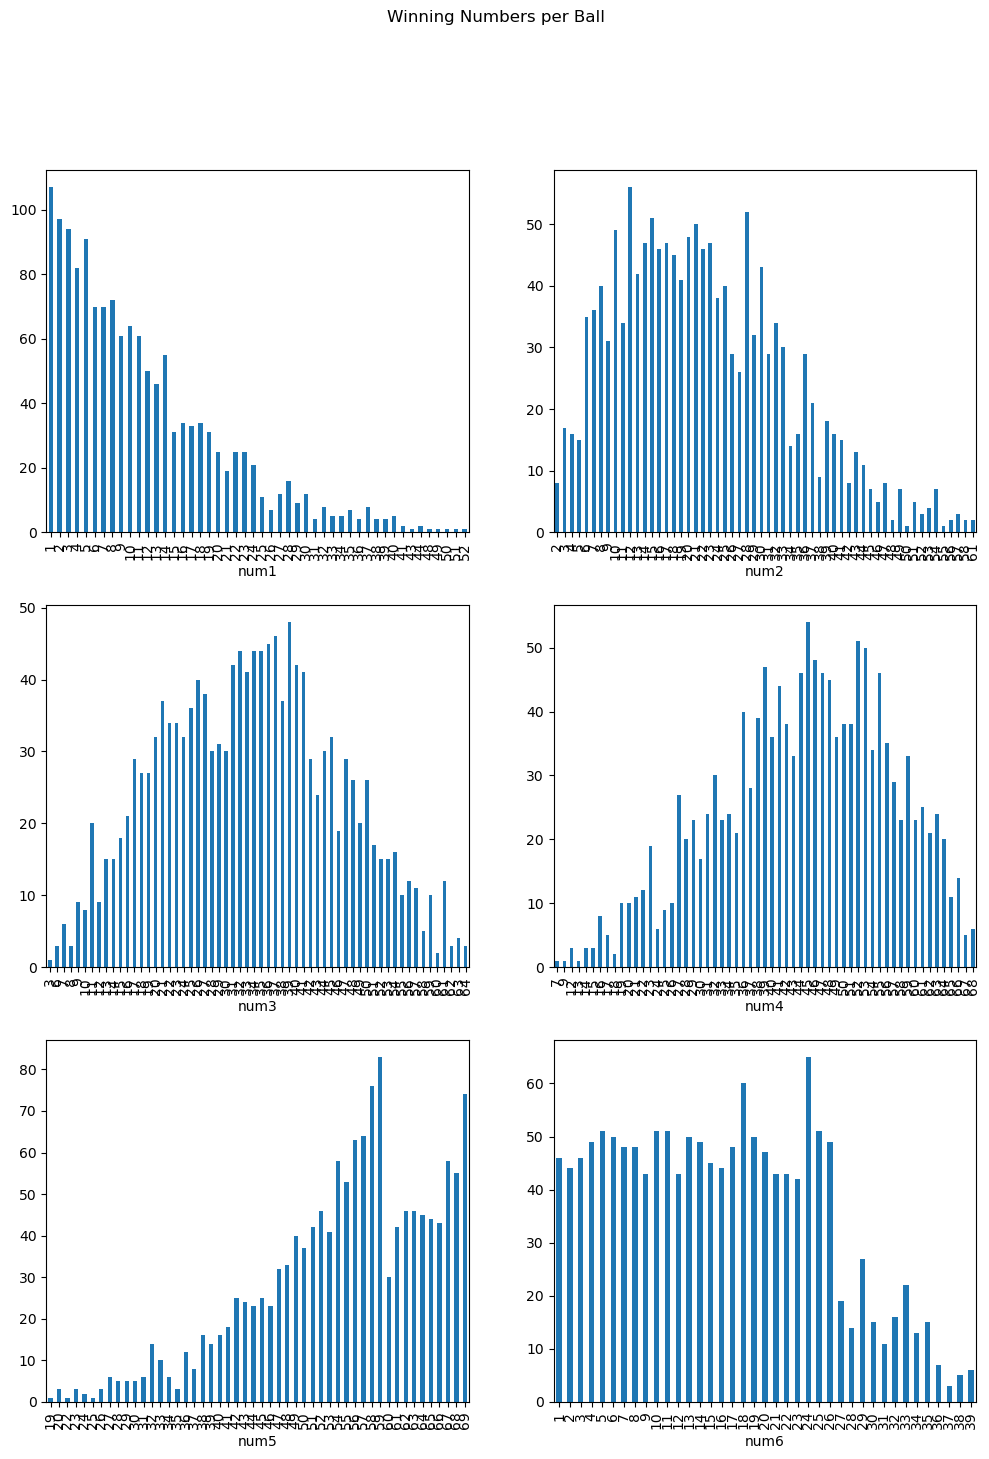

In [64]:
fig, axs = plt.subplots(3,2, figsize=(12,16), squeeze=True)
plt.suptitle('Winning Numbers per Ball')
num1.plot(
    kind='bar',
    ax = axs[0][0]
)
num2.plot(
    kind='bar',
    ax = axs[0][1]
)
num3.plot(
    kind='bar',
    ax = axs[1][0]
)
num4.plot(
    kind='bar',
    ax = axs[1][1]
)
num5.plot(
    kind='bar',
    ax = axs[2][0]
)
num6.plot(
    kind='bar',
    ax = axs[2][1]
)

In [29]:
# Has there been the same numbers drawn before?
powerBall['Winning Numbers'].is_unique

True

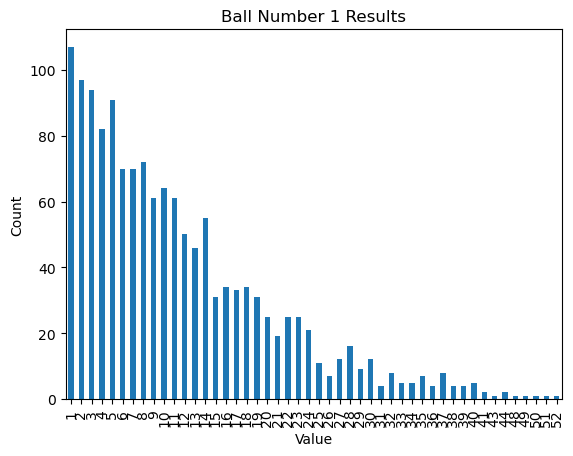

In [73]:
num1.plot(kind='bar', title='Ball Number 1 Results', xlabel='Value', ylabel='Count')
plt.savefig('./images/ball_1.png')